**Getting Data**

In [2]:
!wget --header="Host: uc857aa3f53750ad94265aacf96a.dl.dropboxusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en,en-US;q=0.9,fr;q=0.8" --header="Referer: https://www.dropbox.com/" "https://uc857aa3f53750ad94265aacf96a.dl.dropboxusercontent.com/cd/0/get/BB6IDUrV8Zip_Tpzka2Y7VBdAsEBRqEGSCE0JhisLwDSlCOyxUUCcuphHft3Ko5Qmb5SWtHM-wKRt3OHBqF1gt8jYP6yktUOR9OWdakeY1wNSA/file?_download_id=6264969134592162138587872283989062108884709394678319196834025645693&_notify_domain=www.dropbox.com&dl=1" -c -O 'phase-01-training.tar.gz'

--2020-10-24 16:06:01--  https://uc857aa3f53750ad94265aacf96a.dl.dropboxusercontent.com/cd/0/get/BB6IDUrV8Zip_Tpzka2Y7VBdAsEBRqEGSCE0JhisLwDSlCOyxUUCcuphHft3Ko5Qmb5SWtHM-wKRt3OHBqF1gt8jYP6yktUOR9OWdakeY1wNSA/file?_download_id=6264969134592162138587872283989062108884709394678319196834025645693&_notify_domain=www.dropbox.com&dl=1
Resolving uc857aa3f53750ad94265aacf96a.dl.dropboxusercontent.com (uc857aa3f53750ad94265aacf96a.dl.dropboxusercontent.com)... 162.125.65.15, 2620:100:6021:15::a27d:410f
Connecting to uc857aa3f53750ad94265aacf96a.dl.dropboxusercontent.com (uc857aa3f53750ad94265aacf96a.dl.dropboxusercontent.com)|162.125.65.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2749754446 (2.6G) [application/binary]
Saving to: ‘phase-01-training.tar.gz’

phase-01-training.t 100%[===================>]   2.56G  23.0MB/s    in 2m 0s   

2020-10-24 16:08:01 (21.9 MB/s) - ‘phase-01-training.tar.gz’ saved [2749754446/2749754446]



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Extracting data**

In [4]:
!tar -xf  '/content/phase-01-training.tar.gz' -C '/content/'

In [5]:
!unzip -qq '/content/gdrive/My Drive/classification.zip'

In [6]:
!unzip -qq '/content/gdrive/My Drive/Concat/mask3.zip'

**Importing required libraries**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools
import seaborn as sns
import shutil
from imageio import imread
import imageio
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.resnet import ResNet50, ResNet101, ResNet152
import datetime
from keras.callbacks import TensorBoard
import cv2
from skimage.transform import resize
import PIL
from numpy import save,load
from keras.optimizers import Adam,SGD
%env SM_FRAMEWORK=tf.keras
# from tensorflow import keras
import tensorflow as tf
from keras import backend as K
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Add, Dropout,Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, concatenate,Conv2DTranspose,GlobalMaxPool2D,GlobalAveragePooling2D,UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
import gc
from sklearn.utils import shuffle
from albumentations import (
PadIfNeeded,
HorizontalFlip,
VerticalFlip,
Transpose,
HueSaturationValue,
ElasticTransform,
GridDistortion,
OpticalDistortion,
RandomBrightnessContrast,
RandomGamma,Resize
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import logging
tf.get_logger().setLevel(logging.ERROR)
import warnings  
with warnings.catch_warnings():  
    warnings.filterwarnings("ignore",category=FutureWarning)
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.preprocessing.text import Tokenizer

print('Done') 
from numpy import random

env: SM_FRAMEWORK=tf.keras
Done


**Defining required functions**

In [23]:
base_path = '/content/dataset-dist/phase-01/training/'

In [105]:
def plot_predicted_images(path,index):
    X_val1 = []
    temp1 = resize(imread(path),(256,256,3))
    X_val1.append(temp1)

    Y_val = []
    temp2 = resize(imread('/content/dataset-dist/phase-01/training/fake/' + path.split('/')[6].split('.')[0] + '.mask.png'),(256,256,1))
    Y_val.append(temp2)

    pred = np.squeeze(predicted[index])
    plt.imsave('pred_mask.png',pred)
    im_gray = cv2.imread('pred_mask.png', cv2.IMREAD_GRAYSCALE)
    (thresh, im_bw) = cv2.threshold(im_gray, 220, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(331)
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    
    ax1.set_title("pristine image")
    ax2.set_title("original mask")
    ax3.set_title("predicted binary mask")
    ax1.imshow(X_val1[0])
    ax2.imshow(np.squeeze(Y_val[index]))
    ax3.imshow(im_bw)

    return Y_val,temp1

In [9]:
#method to convert to ela
def ELA(img_path):
    TEMP = 'ela_' + 'temp.jpg'
    SCALE = 10
    original = Image.open(img_path)
    try:
        original.save(TEMP, quality=90)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original, temporary)
        
    except:
        
        original.convert('RGB').save(TEMP, quality=90)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original.convert('RGB'), temporary)
        
       
    d = diff.load()
    
    WIDTH, HEIGHT = diff.size
    for x in range(WIDTH):
        for y in range(HEIGHT):
            d[x, y] = tuple(k * SCALE for k in d[x, y])
    return diff

In [10]:
#Generating ela from normal images and resizing them
def get_image(path):
    return np.array(generate_ela(path, 90).resize((128,128))).flatten()/255

In [11]:
def generate_ela(path,quality):
  temp_file = 'temp_file.jpg'
  # ela_filename = 'temp_ela.png'
  
  image = Image.open(path).convert('RGB')
  image.save(temp_file, 'JPEG', quality = quality)
  temp_image = Image.open(temp_file)
  
  ela_img = ImageChops.difference(image, temp_image)
  
  extrema = ela_img.getextrema()
  max_diff = max([ex[1] for ex in extrema])
  if max_diff == 0:
      max_diff = 1
  scale = 255.0 / max_diff
  
  ela_img = ImageEnhance.Brightness(ela_img).enhance(scale)
  
  return ela_img

In [12]:
# Dice_Coeff or F1 score
def metric(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [186]:
Y_truth = []
def cal_ground():
  for j in img:
    if 'pristine' not in j:
      temp2 = resize(imread('/content/dataset-dist/phase-01/training/fake/' + j.split('/')[6].split('.')[0] + '.mask.png'),(256,256,1))
      Y_truth.append(temp2)

In [ ]:
img = ['/content/dataset-dist/phase-01/training/pristine/000bc3906100ede4b1374cea075adedb.png','/content/dataset-dist/phase-01/training/pristine/00e3659be9c1fec47c739f79252840e3.png','/content/dataset-dist/phase-01/training/fake/d23a8024cc5a377ecfdabb3577e96f10.png','/content/dataset-dist/phase-01/training/fake/d76330914587add652997eda2c3caa98.png','/content/dataset-dist/phase-01/training/fake/aa3b4f7caf9de8c1d6551c33045fb4c1.png','/content/dataset-dist/phase-01/training/fake/d55e4723d6de869b76020bcc1c4cfa26.png']

**Loading models**

In [13]:
#Loading classificatio model
model_classification = tf.keras.models.load_model('/content/content/saved_classification_model/my_model')

#Loading mask prediction model
model_mask = tf.keras.models.load_model('/content/content/saved_mask3_model/my_model3',custom_objects={'metric':metric})

**Models used:**

* *For classification ResNet50 is used with imagenet weights and it is trained on images from CASIA2 dataset as well as dataset from IEEE IFS-TC Image
Forensics Challenge*

* *For mask prediction: Resnet101 with imagenet weights + Gaussian Blur + Concat output from two streams + ELA filter + With Augmentation trained on IEEE IFS-TC Image
Forensics Challenge dataset*

**Preparing data pipeline**

In [61]:
def final_fun_1(X):

  #Checking if image is pristine or fake
  X_test = []
  full_path = os.path.join(X)
  X_test.append(get_image(full_path))

  X_test = np.array(X_test)
  X_test = X_test.reshape(-1, 128, 128, 3)
  Y_pred_test = []
  Y_pred_test = model_classification.predict(X_test)
  Y_pred_classes_test = []
  Y_pred_classes_test = np.argmax(Y_pred_test,axis = 1)
  
  
  if(Y_pred_classes_test[0] == 1):
    pred = 'Authentic'

  else:

    #Predicting mask
    filename = X

    #reading image and resizing it
    X_input1 = []
    temp = resize(imread(filename),(256,256,3))
    X_input1.append(temp)
    X_input1 = np.array(X_input1)

    #Calculating ELA of the image
    ELA(X).save('ELA_image.png')
    X_input2 = []
    temp2 = resize(imread('ELA_image.png'),(256,256,3))
    X_input2.append(temp2)
    X_input2 = np.array(X_input2)

    pred = model_mask.predict([X_input1,X_input2])    
  return pred 



Image 000bc3906100ede4b1374cea075adedb.png is authentic. No mask prediction required


Image 00e3659be9c1fec47c739f79252840e3.png is authentic. No mask prediction required


Image d23a8024cc5a377ecfdabb3577e96f10.png is not authentic. Predicting mask


Image d76330914587add652997eda2c3caa98.png is not authentic. Predicting mask


Image aa3b4f7caf9de8c1d6551c33045fb4c1.png is not authentic. Predicting mask


Image d55e4723d6de869b76020bcc1c4cfa26.png is not authentic. Predicting mask


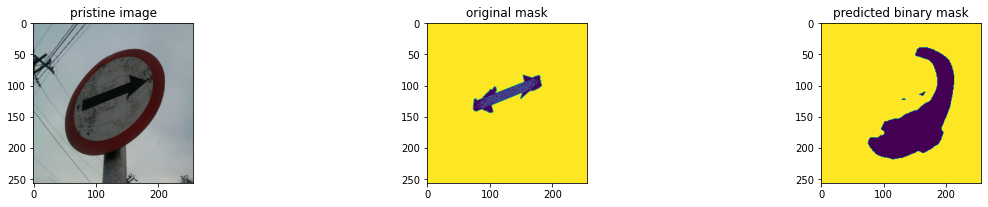

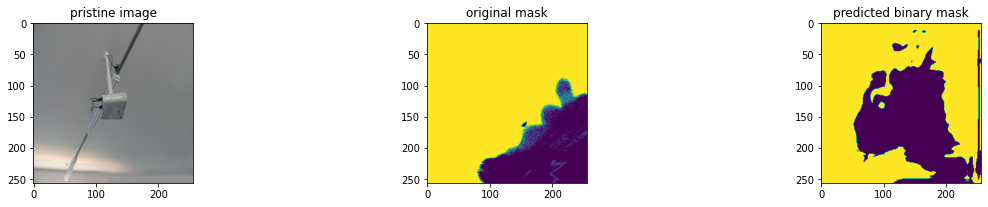

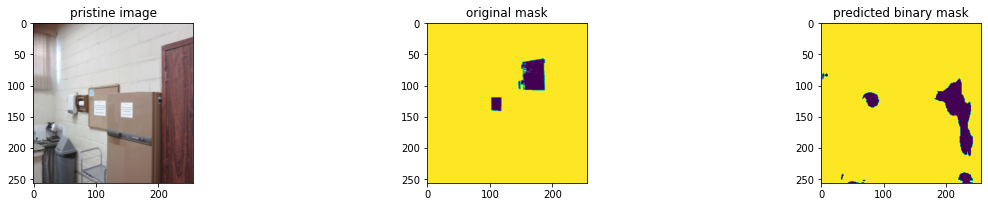

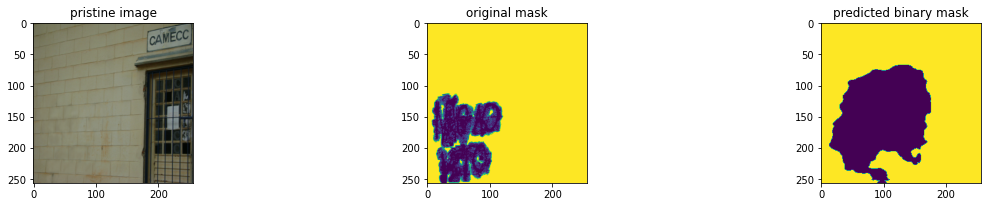

In [143]:
#Predicting images
Y_pred = []
for im in img:
  predicted = final_fun_1(im)
  if isinstance(predicted, str):
    print('\n')
    print('Image ' + im.split('/')[6] +' is authentic. No mask prediction required')
  else:
    print('\n')
    print('Image ' + im.split('/')[6] +' is not authentic. Predicting mask')
    temp2 = plot_predicted_images(im,0)
    Y_pred.append(predicted)

In [187]:
def final_fun_2(X,Y):
  #Calculating ground truth values
  cal_ground()
  
  for i in range(0,len(X)):
    print('Dice Coefficient or F1 Score = ',metric(tf.cast(Y[i], tf.float64),tf.cast(X[i], tf.float64)))

In [188]:
final_fun_2(Y_pred,Y_truth)

Dice Coefficient or F1 Score =  tf.Tensor(0.953680513002532, shape=(), dtype=float64)
Dice Coefficient or F1 Score =  tf.Tensor(0.8404117815183269, shape=(), dtype=float64)
Dice Coefficient or F1 Score =  tf.Tensor(0.9558060840306191, shape=(), dtype=float64)
Dice Coefficient or F1 Score =  tf.Tensor(0.8927793423886474, shape=(), dtype=float64)
